<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> NFL Betting Model </h3> </center>
<center><h4> Ayan Chowdhury, Krishanu Datta, Christian Cattaneo</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

This project aims to create a model that allows for users to place more accurate bets for NFL football games. 

The lucrative world of sports betting is one of great volatility and unpredictability, especially for football. Those in the industry are responsible for carefully setting the lines for each game such that bettors are faced with difficult decisions on which teams to bet on each week. By finding the variables from past games that are most indicative in predicting the outcome and the covering of the spread of a game, one can strive to maximize profits from their bets. 

In this project, we aimed to identify these variables, such as ELO and QB differences as well as the impact of home-field advantage, to perform classification machine-learning tasks to calculate whether a team will cover the spread or not. These results were analyzed to determine whether our chosen variables were significant in their indication of the outcome of a football game. 



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION


### Problem Statement

Our topic is sports betting in relation to NFL (American Football) games. We want to find a way to make good (profitable over a long period of time) bets on NFL games using a data model. We want to learn how to better predict the outcome of NFL games using data. More specifically, we wish to find good indicators (variables) of the outcome of NFL games so that we can be more educated while placing bets on the games. We want to be able to apply the concepts of machine learning to learn how betting models work and explore a shared passion of ours.

### Significance of the Problem

It is important to tackle this problem in our project because it could prove monetarily beneficial to everyone in our group. In addition, working on this problem would help us learn more about how sportsbooks set lines and end up profiting. Insights from this project could be potentially useful for sportsbooks who would want our findings to help set better lines. Once again, the insights from this project would help profit us directly.

### Questions
    
Given the aforementioned problem and its importance, we set out to tackle the following questions:
   * What football statistics are most significant in determining the outcome of football games?
        
   * How does ELO rating relate to the margins of victory in NFL football contests?
        
   * Is the difference in quarterback ratings between two professional football teams indicative of the resulting score of NFL games?
        
   * What influence does a team playing in their home field have on their performance on the turf?
        
   * Which supervised machine learning classification model (k-Nearest-Neighbor, Support Vector Machines, or Decision Trees) would have a higher prediction accuracy for our problem? We believe SVM could be a superior algorithm to kNN because it can capture more complicated relationships between datapoints. Moreover, SVM uses classification for binary grouping problems which fits better for our data. In addition, we have a relatively low amount of features and training data, which bodes better for SVM.
   
### Hypotheses

 * **Hypothesis about ELO Rating:**
      * Null: The difference in ELO ratings of teams does not have a significant impact on determining whether the favorite covers the spread of the game. (H1,0)
      * Alternative: The difference in ELO ratings of teams does have a significant impact on determining whether the favorite covers the spread of the game. (H1,1)
 * **Hypothesis about home-field advantage**:
      * Null: Home field advantage in NFL games does not have a significant impact on determining whether the favorite covers the spread of the game. (H2, 0)
      * Alternative: Home field advantage in NFL games does have a significant impact on determining whether the favorite covers the spread of the game. (H2, 1)
 * **Hypothesis about SVM as the best classification model**:
      * Null: The SVM classifier will not be significantly more accurate on our testing and training data in comparison to kNN and Decision Trees. (H3, 0)
      * Alternative: The SVM classifier will be significantly more accurate on our testing and training data in comparison to kNN and Decision Trees. (H3, 1)

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition 

We obtained the data from a public GitHub repository. We were linked there from a similar project on Kaggle. The data is full of helpful features and includes outcome variables which will be helpful for the later part of our project.

Here is the link: https://www.kaggle.com/twalters20/nfl-betting-model/data?select=spreadspoke_scores.csv 

The original source of the data is this website: http://www.repole.com/sun4cast/data.html 

The table below is a list of the feature variables and their descriptions for our original dataset:

| Variable name in file |	Description	| Feature/ Outcome
| --- | --- | --- |
schedule_date| 	The date of the scheduled NFL game.| 	Feature
schedule_season| 	The season of the scheduled game (should correspond to a year).	| Feature
schedule_week| 	The week of the scheduled game (should be a value between 1-20).| 	Feature
team_home| 	The abbreviation of the home team.	| Feature
team_away| 	The abbreviation of the home team.	| Feature
team_favorite_id	| The abbreviation of the team favored to win.	| Feature
spread_favorite| 	The amount of points the favored team is favored by.	| Feature
over_under_line| 	The over/under line set for the game.| 	Feature
weather_temperature	| The temperature in Fahrenheit of the scheduled game.	| Feature
weather_wind_mph| 	The wind speed in mph of the game.	| Feature
score_home| 	The amount of points the home team scored.	| Feature
score_away	| The amount of points the away team scored.	| Feature
stadium_neutral	| Indicates if the game was played in a neutral setting.	| Feature
home_favorite| 	Positive if the home team is the favorite.	| Feature
away_favorite| 	Positive if the away team is the favorite.	| Feature
favorite_cover | Positive if the favored team covers | Outcome
over	| Positive if the over was covered.	| Outcome
playoff	| Indicates whether the game was a playoff game.	| Feature
elo1_pre| 	The ELO strength of the home team.	| Feature
elo2_pre| 	The ELO strength of the away team.	| Feature


Our dataset contains data on every NFL game ever played dating back to 1979. As a result, the dataset has over 10,000 samples. The dataset has roughly 30 variables.


### 2.2. Data Analysis
* For our hypotheses, our dependent variable is whether or not the favorite team has covered the spread. To explain this in non-football terminology, the spread is essentially the margin of victory that a team wins/loses by. The expected margin of victory of each game is set by Las Vegas each week, and bettors decide whether or not to bet on a favorite team exceeding that spread. For example, if Team A and Team B were playing a football game, and the spread was set at -7 in favor of Team A, this means that Team A is expected to win by 7 points. A potential bettor could choose to bet that spread, meaning that they believe that Team A will win the match by more than 7 points. For our first hypothesis, our independent variable is the difference of ELO ratings between the two teams in a game. The ELO rating of a team is essentially a singular aggregated score that indicates the overall performance and strength of a team. By varying the differences in ELO ratings of teams, our hypothesis aims to determine whether these differences are telling in whether a team covers the spread or not. For our second hypothesis, our independent variable is home-field advantage, which is used to determine statistical significance between a favored home team and the outcome of the spread.


* As mentioned before, the outcome variable that we want to predict is whether or not a team covers the spread of the game. We want to use feature variables such as ELO differences, QB ELO differences, home field advantage, ELO probability differences, and an engineered "super-home field advantage" variable. Our ELO difference predictors are important predictors as they are able to quantify the strength of a team in a singular variable, and since the quarterback is by far the most important position on the field, comparing the strength of QB's in a game would be beneficial in predicting our outcome. Additionally, home-field advantage has been an important aspect of football games for decades, thus our model looks to utilize this variable to predict the spread outcome. In order to maximize the impact of home-field advantage, we will use one-hot encoding to create a super home-field advantage variable for teams that have an additional home-field advantage due to the strength of their fanbase, the geographic location of their teams, and more.


* This problem is a supervised ML problem as it takes in labeled input data (ELO difference, QB ELO difference, home field advantage, etc) and trains a model to predict a wanted output (whether the favorite covered the spread). This is a binary classification task, as the model aims to classify each game into one of two groups: whether the favorite will cover the spread or not. 


* We will be using multiple different classification algorithms for this model. They are as follows:
    * K-Neighbors Classifier - This simple classification algorithm allows for the testing and training data to be grouped based on their relative distances to each other. The data points that are closer together in a group can be defined as one of the target variables (covering the spread or not). 
    * Support Machine Vector - This classification algorithm computes a linear representation of the boundary between the two target variables. It assumes that there exists a plane in which the two outcomes can be differentiated by, and is favorable compared to our K-Neighbors Classifier, as it is better in its accounting of outliers and works better with small amounts of feature variables and data points. 
    * Decision Tree Classification - This classification algorithm breaks down the dataset into smaller groups based on whether each feature variable for a data point meets a certain threshold. A tree structure is created based on each of the groups of data, for example there could exist a group where a team has super home-field advantage, a QB ELO difference above 150, and a QB ELO difference below 200. This algorithm is faster than K-Neighbors, and make no prior assumptions about the data's distribution unlike Support Vector Machine.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling


#### 3.1.1 Data Cleaning

The below cell contains the original data preprocessing performed such that our model has the appropriate variables to conduct machine learning investigations. We first import our CSV datasets as dataframes into our notebook using pandas library. Then, we prepare our two dataframes to be merged by making sure all the dates and team abbreviations are correct. We must do this because if the variable values are not correct the two dataframes will not merge correctly. After preprocessing this data, we merged the dataframes so that each team and quarterback had an ELO value and ELO probability for each game. We then omitted columns that were not conducive to our overall machine learning goals, and dropped all rows with null values so our model would not be skewed by outliers.

In [3]:
import pandas as pd
import numpy as np
import datetime

## importing NFL Betting Data and NFL ELO data and storing in dataframe objects

##bdf = pd.read_csv("nfl_betting_data.csv", encoding='utf-8')
df = pd.read_csv("https://raw.githubusercontent.com/krishanu-datta/NFL_Betting_Model/main/nfl_betting_data.csv", encoding='utf-8')
games_elo = pd.read_csv("https://raw.githubusercontent.com/krishanu-datta/NFL_Betting_Model/main/nflelo.csv", encoding='utf-8')

## cleaning dataframes by fixing dates and team labels in preparation for merge
## IMPORTANT: This cleaning was originally performed by another source, which can be accessed from the link in 2.1.
wsh_map = {'WSH' : 'WAS'}
games_elo.loc[games_elo.team1 == 'WSH', 'team1'] = 'WAS' 
games_elo.loc[games_elo.team2 == 'WSH', 'team2'] = 'WAS'
df.loc[(df.schedule_date == '2016-09-19') & (df.team_home == 'MIN'), 'schedule_date'] = datetime.datetime(2016, 9, 18)
df.loc[(df.schedule_date == '2017-01-22') & (df.schedule_week == 21), 'schedule_date'] = datetime.datetime(2017, 2, 5)
df.loc[(df.schedule_date == '1990-01-27') & (df.schedule_week == 21), 'schedule_date'] = datetime.datetime(1990, 1, 28)
df.loc[(df.schedule_date == '1990-01-13'), 'schedule_date'] = datetime.datetime(1990, 1, 14)
games_elo.loc[(games_elo.date == '2016-01-09'), 'date'] = datetime.datetime(2016, 1, 10)
games_elo.loc[(games_elo.date == '2016-01-08'), 'date'] = datetime.datetime(2016, 1, 9)
games_elo.loc[(games_elo.date == '2016-01-16'), 'date'] = datetime.datetime(2016, 1, 17)
games_elo.loc[(games_elo.date == '2016-01-15'), 'date'] = datetime.datetime(2016, 1, 16)

## merge two dataframes into one
df = df.merge(games_elo, left_on=['schedule_date', 'team_home', 'team_away'], right_on=['date', 'team1', 'team2'], how='left')

## drop columns we that have no potential impact on our model
df = df.drop(columns=['qb1_adj',
       'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value',
       'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post',
       'qbelo2_post', 'score1', 'score2','qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'date', 'season',
       'neutral', 'playoff', 'team1', 'team2', 'elo1_pre_y', 'elo2_pre_y', 'elo1_post','elo2_post'])

## drop all rows with null or empty values
df = df.dropna()

#### 3.1.2 Feature Extraction
In this section, new feature variables were created using a variety of data wrangling techniques. In order to create variables which represented difference, we subtracted the pre-existing columns which represented the ratings of two teams, the ratings of each team's QB, and the margin of victory for each game. Next, we utilized the one-hot encoding approach to quantify the home team of a game which was previously represented as a categorical variable. From this extraction, we were able to add an additional feature variable to our dataframe, which was indicative of a "super" home field advantage. 

In [4]:
## creating new feature variables from existing columns
df["qb_elo_diff"] = abs(df["qbelo1_pre"] - df["qbelo2_pre"])
df["elo_prob_diff"] = abs(df["elo_prob1"] - df["elo_prob2"])
df["elo_diff_home_minus_away"] = df["elo1_pre_x"] - df["elo2_pre_x"]
df["margin_home_minus_away"] = df["score_home"] - df["score_away"]

## one-hot encoding of team_home feature to numerically signify which teams are playing at home
home_field = pd.DataFrame()
home_field["Home"] = df["team_home"]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
encoded_array = encoder.fit_transform(home_field)
encoder.get_feature_names()
encoder_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names())

## using one-hot encoding data to create super home field advantage feature variable
list_super = (encoder_df['x0_ARI'] + encoder_df['x0_SEA'] + encoder_df['x0_NO'] + encoder_df['x0_BAL']
+ encoder_df['x0_GB'] + encoder_df['x0_NE'] + encoder_df['x0_PIT'] + encoder_df['x0_DEN'])
df = df.reset_index(drop=True)
df["super_home_advantage"] = list_super

#### 3.1.3 Setting Features and Target Values

In [5]:
features = df[["home_favorite","elo_difference","qb_elo_diff","elo_prob_diff", "super_home_advantage"]]
target = df["favorite_cover"]

#### 3.1.4 Further Data Preprocessing using MinMax Scaler

In order to normalize our data, the use of a MinMax scaler is beneficial. It rescales the dataset such that all feature values are within the range of 0 to 1, in order to level the different feature variables in the same range of values.

In [6]:
## import and intialize scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## fit scaler to data
scaler.fit(features)
features_scaled = scaler.transform(features)

#### 3.1.5 Feature Selection
We performed the RFE feature selection technique on our five feature variables. We did this in order to determine the most important feature variables in terms of how they impacted the target variable, favorite_cover. We first split our data into a training and testing set, and called the RFE object and parameterized it such that the three most important features would be printed. For this task, we used the Support Vector Machines classifying algorithm to create and evaluate a model. Next, we iterated through our features and if a feature was selected by the RFE technique, then it was printed.

Finally, we printed the training and testing accuracies of a model with the selected features. Unfortunately, these values were lower than expected. We believe this is a case of the model underfitting the data. We believe that the model is underfitting because the model performed poorly on the training data. For this reason, we will be using all the features in our feature set to create a model. 

Due to the small number of features in our total feature set, using its entirety for machine learning algorithm creation would be beneficial to avoid underfitting.



In [7]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)

def RFE_feature_selection():
    
    select = RFE(DecisionTreeRegressor(random_state=1), n_features_to_select=3)
    
    #fit the RFE selector to the training data
    select.fit(X_train, y_train)

    #transform training and testing sets so only the selected features are retained
    X_train_selected = select.transform(X_train)
    X_test_selected = select.transform(X_test)
    
    model = LinearSVC().fit(X=X_train_selected, y=y_train)
    
    print("Selected features after RFE:")
    for i in range(len(select.get_support())):
        if select.get_support()[i]:
            print(features.columns[i]) #gets the features for which get_support is true
    
    accuracy_train = model.score(X_train_selected, y_train)
    accuracy_test = model.score(X_test_selected, y_test)

    print("\nkNN Classification performance with selected features:")
    print("\t Prediction accuracy on the train data:", f"{accuracy_train:.2%} \n")
    print("\t Prediction accuracy on the test data:", f"{accuracy_test:.2%} \n")

RFE_feature_selection()


Selected features after RFE:
elo_difference
qb_elo_diff
elo_prob_diff

kNN Classification performance with selected features:
	 Prediction accuracy on the train data: 47.04% 

	 Prediction accuracy on the test data: 48.31% 



/Users/Ayan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 3.2. Data Exploration


#### 3.2.1 Data Visualization 1: The Impact of Home Field on Outcome of Games
This bar graph displays the impact of home field advantage on the outcome of games. It compares the number of wins of teams playing at home versus teams playing away in all NFL games since 1979. If home field had no significance, the graph we should two bars which are similar in height as home and away teams would each win around 50% of their games. However, the bar chart below demonstrates that home teams have won significantly more than 50% games, thus confirming the idea of home field advantage.

In [8]:
import matplotlib.pyplot as plt
plt.bar(['home','away'],[sum(df["score_home"]>df["score_away"]), sum(df["score_away"]>df["score_home"])],width=0.5)
plt.title('The Impact of Home Field on Outcome of Games')
plt.xlabel('Location')
plt.ylabel('Number of Wins')
plt.show()

<Figure size 640x480 with 1 Axes>

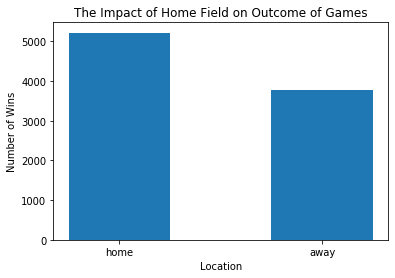

In [9]:
from PIL import Image
import requests
from io import BytesIO

response1 = requests.get("https://raw.githubusercontent.com/krishanu-datta/NFL_Betting_Model/main/The%20Impact%20of%20Home%20Field%20on%20Outcome%20of%20Games.png")
img1 = Image.open(BytesIO(response1.content))
img1

#### 3.2.2 Data Visualization 2: ELO Rating Difference vs. Margin of Victory
This scatter-plot represents the relationship between the difference in ELO Ratings of teams (x-axis) and the margin of victory of games (y-axis). We inquired if larger ELO rating differences corresponded to discrepancies in points scored. This plot shows that this is the case as a strong positive linear correlation is shown between the two fields. The scatter graph demonstrates that as a game has a higher difference in ELO rating, it will tend to have a greater margin of victory.

C:\Users\kdatt\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Margin of Victory')

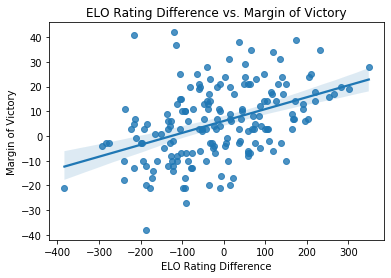

In [9]:
import seaborn as sns
sns.regplot(df["elo_diff_home_minus_away"][::50], df["margin_home_minus_away"][::50]).set_title('ELO Rating Difference vs. Margin of Victory')
plt.xlabel('ELO Rating Difference')
plt.ylabel('Margin of Victory')

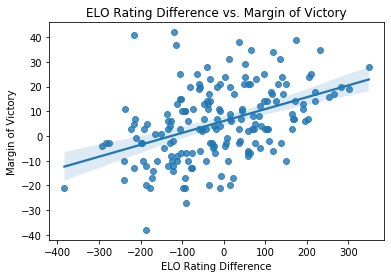

In [10]:
response2 = requests.get("https://raw.githubusercontent.com/krishanu-datta/NFL_Betting_Model/main/ELO%20Rating%20Difference%20vs.%20Margin%20of%20Victory.png")
img2 = Image.open(BytesIO(response2.content))
img2

#### 3.2.1 Data Visualization 3: Impact of QB ELO Difference on Spread Coverage
For this exploration, we decided to implement a conditional density plot from the seaborn library. On the x-axis, the difference in QB ELO ratings of each game are represented from 0 to 375. On the y-axis the percentage of games covered versus games that were not covered are shown at each interval of QB ELO difference. Although the general shape of the density curve possesses a low degree of volatility, the overall trend indicates that as QB ELO difference increases, the density of games that are covered by the favorite also increases.

Text(0.5, 1.0, 'Impact of QB ELO Difference on Spread Coverage')

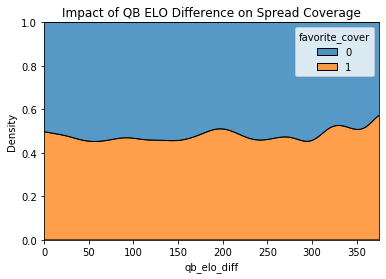

In [11]:
qbplot = sns.kdeplot(data=df[["qb_elo_diff", "favorite_cover"]], x="qb_elo_diff", hue="favorite_cover", multiple="fill")
qbplot.set(xlim=(0,375),ylim=(0,1))
plt.title("Impact of QB ELO Difference on Spread Coverage")
#NOTE: You must update your seaborn to seaborn version 11 if you get this error:
## TypeError: _bivariate_kdeplot() got multiple values for argument 'x'

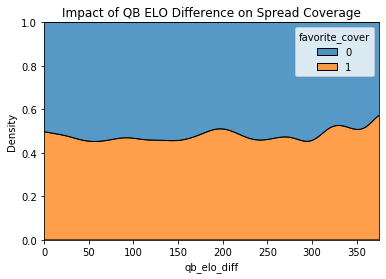

In [12]:
response3 = requests.get("https://raw.githubusercontent.com/krishanu-datta/NFL_Betting_Model/main/Impact%20of%20QB%20ELO%20Difference%20on%20Spread%20Coverage.png")
img3 = Image.open(BytesIO(response3.content))
img3

### 3.3. Model Construction

#### 3.3.1 Hypothesis Test 1

* Purpose: An independent sample t test was conducted to determine whether the differences in ELO rating were statistically significant in their determination of whether the favorite covered the spread.

* Actual Results: Results showed a statistically significant difference between the two variables, t(1198) = -2.41, p < .05. An examination of the number of games predicted as not covering the spread revealed that the average difference in ELO ratings of teams was less (n = 626, M = 102.781, SE = 2.985) compared to those whose games were predicted as covering the spread (n = 574, M = 113.743, SE = 3.544). 

* Meaning: These results indicate that the ELO rating differences are a statistically significant indicator in choosing whether a favored team covers the spread or not in a game. 

In [13]:
## select IV and DV from main dataframe
df_used = df[["elo_difference", "favorite_cover"]]
df_simplified = df_used.tail(6000)[::5]

## display summary table of target variables
descriptives = df_simplified.groupby("favorite_cover").agg(["count", "mean", "std", "sem"])
descriptives = descriptives["elo_difference"]
descriptives.reset_index(inplace=True)

## create new variables to sort data by if the favorite covered
didnt_cover = df_simplified[df_simplified["favorite_cover"] == 0]["elo_difference"]
did_cover = df_simplified[df_simplified["favorite_cover"] == 1]["elo_difference"]

## run independent sample t-test
from scipy import stats
results = stats.ttest_ind(didnt_cover, did_cover)
tstatistic = results[0]
pvalue = results[1]
dof = len(didnt_cover) + len(did_cover) - 2
def report_independent_t (t, p, df):
    print("t(%d)=%.2f, p=%.3f" % (df, t, p))

## run levene and shapiro tests
levene_results = stats.levene(didnt_cover, did_cover)
shapiro_results = stats.shapiro(df_simplified["elo_difference"])

## return results
print(descriptives)
print("\n\n")
report_independent_t(tstatistic,pvalue,dof)
print("Levene Results: " + str(levene_results))
print("Shapiro Results: " + str(shapiro_results))

   favorite_cover  count        mean        std       sem
0               0    626  102.781979  74.678613  2.984758
1               1    574  113.742568  82.743373  3.453642



t(1198)=-2.41, p=0.016
Levene Results: LeveneResult(statistic=4.189769972006118, pvalue=0.04088642802090312)
Shapiro Results: (0.9333998560905457, 1.0285759181317381e-22)


#### 3.3.2 Hypothesis Test 2

* Purpose: An independent sample t test was conducted to determine whether a favored team with home-field advantage would yield statistically significant results in their determination of whether the favorite covered the spread.

* Actual Results: Results showed a statistically significant difference between the variables, t(998) = -2.07, p < .05. An examination of the number of games predicted as not covering the spread revealed that the favored home-field advantage rating (which was either a 0 if the team was not playing at home, or 1 if the team was playing at home) was less (n = 558, M = 0.642, SE = 0.020) compared to those whose games were predicted as covering the spread (n = 442, M = 0.704, SE = 0.022). 

* Meaning: These results indicate that teams who are favored and have home-field advatange are a statistically significant indicator in choosing whether a favored team covers the spread or not in a game.

In [14]:
## select IV and DV from main dataframe
df_used = df[["home_favorite", "favorite_cover"]]
df_simplified = df_used.head(1000)

## display summary table
descriptives = df_simplified.groupby("favorite_cover").agg(["count", "mean", "std", "sem"])
descriptives = descriptives["home_favorite"]
descriptives.reset_index(inplace=True)

## create new variables to sort data by if the favorite covered
fave_didnt_cover = df_simplified[df_simplified["favorite_cover"] == 0]["home_favorite"]
fave_did_cover = df_simplified[df_simplified["favorite_cover"] == 1]["home_favorite"]

## run independent sample t-test
from scipy import stats
results = stats.ttest_ind(fave_didnt_cover, fave_did_cover)
tstatistic = results[0]
pvalue = results[1]
dof = len(fave_didnt_cover) + len(fave_did_cover) - 2

## run levene and shapiro tests
levene_results = stats.levene(fave_didnt_cover, fave_did_cover)
shapiro_results = stats.shapiro(df_simplified["home_favorite"])
def report_independent_t (t, p, df):
    print("t(%d)=%.2f, p=%.3f" % (df, t, p))

## return results
report_independent_t(tstatistic,pvalue,dof)
print("Levene Results: " + str(levene_results))
print("Shapiro Results: " + str(shapiro_results))

t(998)=-2.07, p=0.038
Levene Results: LeveneResult(statistic=4.297167857892466, pvalue=0.03843208196808205)
Shapiro Results: (0.5936613082885742, 3.1389085600875902e-43)


#### 3.3.3 Applying Machine Learning Algorithms + Training/Testing

In [15]:
## import appropriate packages and library
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## make a dictionary of different ML algorithms
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(n_neighbors=5), 
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': LinearSVC(max_iter=100),
    'Logistic Regression': LogisticRegression()}

## split data and run each model on it, and display corresponding performance metrics
def classifiers_percentage_split():
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=6)
    for estimator_name, estimator_object in estimators.items():
        estimator_object.fit(X=X_train, y=y_train)
        accuracy_test = estimator_object.score(X_test, y_test)
        accuracy_train = estimator_object.score(X_train, y_train)
        predicted = estimator_object.predict(X=X_test)
        expected = y_test
        class_report = classification_report(y_true=expected, y_pred=predicted)
        print(estimator_name)
        print("\t Prediction accuracy on the training data:", f"{accuracy_train:.2%} \n")
        print("\t Prediction accuracy on the test data:", f"{accuracy_test:.2%} \n")
        print(class_report)
        
classifiers_percentage_split()

k-Nearest Neighbor
	 Prediction accuracy on the training data: 68.64% 

	 Prediction accuracy on the test data: 50.13% 

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1223
           1       0.45      0.45      0.45      1027

    accuracy                           0.50      2250
   macro avg       0.50      0.50      0.50      2250
weighted avg       0.50      0.50      0.50      2250

Gaussian Naive Bayes
	 Prediction accuracy on the training data: 52.06% 

	 Prediction accuracy on the test data: 54.49% 

              precision    recall  f1-score   support

           0       0.55      0.92      0.69      1223
           1       0.51      0.09      0.16      1027

    accuracy                           0.54      2250
   macro avg       0.53      0.51      0.42      2250
weighted avg       0.53      0.54      0.45      2250

Decision Tree
	 Prediction accuracy on the training data: 100.00% 

	 Prediction accuracy on the test 

C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 3.4. Model Evaluation

#### 3.4.1 Model Evaluation

* For model evaluation, five different classification algorithms were utilized to compare metrics in order to decide which one performed the best on the training and testing sets. After the creation of an estimator dictionary storing the classification algorithms, and the running of each algorithm through a for-loop, the prediction accuracy and the overall classification report were returned, which were used for analysis. According to the outputted data, the Support Vector Machine, Logistic Regression, and Gaussian Naive Bayes had the highest prediction accuracy scores out of all the models used, as they all performed around 54-55% for the testing data. The Decision Tree and k-Nearest Neighbors algorithms performed the poorest, with accuracy rates hovering around 50%.  
    * Though this number seems low, within the context of our intended modeling of sports betting, it actually is representative of a strong likelihood of profit. Due to the fact that our model's accuracy is higher than 52.4% (the magic number for breaking even in sports betting -- see more in discussion section), it can be utilized for profit. 
    
* To continue our performance evolution, a classification report was additionally created for each of the classifiers to determine the specific metrics that each classifier could be evaluated upon. For one, the precision of each target variable was measured, this represents the model's ability to not classify non-covered spread games as covered spread games, and vice versa. Additionally, the recall of each target variable was measured, which was indicative of the model's ability to find all 0's and all 1's within the datasets. Finally, the f-1 scores of the target variables were displayed in the classification report, which was a determined harmonic mean between the precision and recall scores. The closer this score is to 1, the better the model is for classification. 
    * From the report, we can surmise many inferences about our data. The best precision score belonged to the Gaussian Naive Bayes classification algorithm, scoring 0.54 on the 0's and 0.51 on the 1's. This means that a 0 target variable (spread not covered) would not be classified as a 1 target variable (spread covered) 55% of the time, and a 1 would not be classified as a 0 51% of the time. The overall precision scores were around 0.48-0.55, with the worst model being the Decision Tree (0.52 and 0.43). 

* With regards to overfitting/underfitting, the k-Nearest Neighbors and Decision Tree algorithms were subject to large amounts of overfitting, which is in line with what was earlier stated about the best models for our data. The Support Vector Machine, Gaussian Naive Bayes, and Logistic Regression models all had roughly the same scores of around 52-55%, which was indicative of a balanced fit. 

### 3.5 and 3.6. Model Optimization and Model Testing

We decided to perform hyperparameter tuning on the Support Vector Machine classification algorithm below. This was done to maximize the control of our training model's behavior and predictive ability. In particular, we wanted to vary the number of max iterations to strike a balance between the model overfitting and underfitting our data. The C-Value is also a parameter we chose to manipulate in order to find the correct margins of our hyperplane.

In [16]:
## import appropriate packages and libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def grid_search_tuning():
    param_grid = {"max_iter":[10, 100, 1000],"C":[0.000001,.00001,.0001,.001]}
    from sklearn.model_selection import train_test_split

    #import GridSearchCV and fit GridSearchCV
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5)

    #split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=6)

    #fit the grid search object on the training data (CV will be performed on this)
    grid_search.fit(X=X_train, y=y_train)

    #result of grid search
    print("Best parameters: ", grid_search.best_params_)
    print("Best cross-validation score: ", grid_search.best_score_)
    print("Test set score: ", grid_search.score(X_test, y_test))
    #the performance of the best found parameters on the test set
    #this is what you report for the evaluation of your model
grid_search_tuning()

C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Best parameters:  {'C': 1e-06, 'max_iter': 10}
Best cross-validation score:  0.5262222222222223
Test set score:  0.5462222222222223


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
 
###### Algorithms Compared

For our machine learning model creation, we tested five different supervised machine learning classification algorithms: k-Nearest Neighbor, Gaussian Naive Bayes, Decision Tree, Support Vector Machine, and Logistic Regression. 
   

###### Best Algorithms

The algorithms were evaluated based on multiple classification metrics, specifically prediction accuracy, recall and f1 scores. A few algorithms stood out as having better performances than the rest. These algorithms were the Gaussian Naive Bayes, Support Vector Machine and the Logistic Regression algorithms. These algorithms all had accuracies of 54.49%, 54.27% and 54.36% respectively. That means that each of these algorithms returned an accuracy of more than 54%. They also had recall scores for predicting the "0" target variable.
    
However, the recall score for the "1" target variable yielded very low results (around 0.05) for these algorithms. Another note to add is the relative inaccuracy f1 scores due to the large skew in recall scores between the two target variables. Therefore, we did not use the f1 as a metric to measure the performance of the model.
    
###### Algorithm for Predictive Model

After initial training and testing using all of the machine learning classifers, we narrowed our list down to the Gaussian Naive Bayes, Support Vector Machine and the Logistic Regression algorithms as these algorithms yielded similar training and testing scores. Then, we chose to hyperparameter tune the Support Vector Machine model with the number of iterations and c-values. We were unable to hyperparameter tune the other two algorithms due to lack of parameters that could be inputted into the models. After hyperparamter tuning using Grid Search, we found that the Support Vector Machines algorithm had a slightly higher accuracy than the Gaussian Naive Bayes and Logistic Regression algorithms. As a result, we will use the Support Vector Machines algorithm for our predictive model. However, in the future Gaussian Naive Bayes and Logistic Regression algorithms would still be considered as algorithms we could implement for our predictive model.
   
###### Practicality of Algorithms and Further Discussion

Based on our findings, we can use the features in our dataset to predict the outcome variable we've identified. Although an accuracy of between 54 percent and 55 percent may seem low, that level of accuracy is very high in the world of sports betting. This is because sports, including NFL games, are incredibly random and each spread bet is a 50-50 call. The bookies and books take a portion of your bet, the accuracy that one must correctly place spread bets at is 52.4% to break even (https://medium.com/the-intelligent-sports-wagerer/why-52-4-is-the-most-important-percentage-in-sports-gambling-16ade8003c04). Furthermore, according to our research, most professional sports betters "rarely sustain a long-term winning percentage higher than 55%, and it's often as low as 53 or 54 percent." (professionalgambler.org). Therefore, our model performs as well as a professional sports better would at predicting the outcomes of spreads of NFL games. 
    
However, although our model has a high enough accuracy to make money off predicting the outcome of NFL spreads, we are unsure about its consistency. Based on the aforementioned low recall scores outputted by several of our algorithms, our models did not seem to be able to predict the "1" target variables at a high rate, meaning that a very low percentage of spreads were correctly predicted to be covered by the favorite. This demonstrates the high volatility and unpredicability of the NFL betting world, where variables with seemingly strong correlations to correct outcome prediction may not be as indicative as they as appear. Moreover, our small feature set played a role in the varied results of classification metric scores, displaying a need for adding feature variables in future iterations of this model. 

Overall, our model performs well in the theoretical context of the sports betting world. However, there are definite improvements need to be made before it can be applied for monetary gain in the real world.
    
###### Hypothesis Interpretation

Our independent samples t-tests were conducted and reported in sections 3.3.1 and 3.3.2. See above for analysis.


###### Conclusion

This project was a great way to get hands-on experience with the various topics of data science relating to machine learning. From initial data acquisition, wrangling and cleaning to evaluating and testing our final model, the overall process proved challenging, yet highly rewarding and enlightening. As of now, our model only accounts for five feature variables that were found and derived from our datasets; however, models in sports betting have a high degree of complexity that five feature variables cannot fully account for. Therefore, the addition of more variables would likely increase the success of our model.
One idea we had for the future could be to increase the number of features in our algorithm was to utilize web-scraping in order to scrape data such as recent point differentials, offensive vs. defensive rankings and team performance on turf fields. 

We also were interested in creating new models that were similar in nature to our model, which predicted spread coverage. These models could be responsible for predicting general outcomes of games (moneyline bets), as well as the total score of games (over/under bets). This would create a comprehensive betting models for different types of bets and would diversify our stream of income.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

Our contributions are reflected in the peer evaluation forms. Overall, our group collaborated effectively via Zoom and each section was collectively worked on such that mutual understanding of the entire project was achieved.